In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
sns.set_context('poster', font_scale=1.25)

In [4]:
sns.set_style('white')

In [5]:
%load_ext autoreload
%autoreload 2

In [6]:
from LB_D2Q9.dimensionless import opencl_dim as lb

# Visualizing the evolution of flow around an obstacle

In [7]:
N = 25 # resolution of obstacle: number of grid points over radius

D = 1. # meter
rho = 1. # kg/m^3
nu = 1. # Viscosity, m^2/s

pressure_grad = -100 # Pa/m

pipe_length = 3*D # meter

# initialize cylinder
cylinder_center = [pipe_length/4, D/2]
cylinder_radius = D/25

sim = lb.Pipe_Flow_Cylinder(diameter=D, rho=rho, viscosity=nu, pressure_grad=pressure_grad, pipe_length=pipe_length,
                             N=N, time_prefactor=1.,
                             cylinder_center=cylinder_center, cylinder_radius=cylinder_radius,
                             two_d_local_size = (32, 32), three_d_local_size = (32, 32, 1))

Characteristic L: 0.04
Characteristic T: 0.0032
Reynolds number: 156.25
omega 1.92604006163
2d global: (1888, 640)
2d local: (32, 32)
3d global: (1888, 640, 9)
3d local: (32, 32, 1)
The platforms detected are:
---------------------------
NVIDIA CUDA NVIDIA Corporation version: OpenCL 1.2 CUDA 7.5.23
The devices detected on platform NVIDIA CUDA are:
---------------------------
GeForce GTX TITAN Black [Type: GPU ]
Maximum clock Frequency: 980 MHz
Maximum allocable memory size: 1610 MB
Maximum work group size 1024
Maximum work item dimensions 3
Maximum work item size [1024, 1024, 64]
---------------------------
This context is associated with  1 devices
inlet rho: 1.0092209152
outlet rho: 1.0


In [8]:
print 'Total num grid points:' , '%.3E' % (sim.nx*sim.ny)

Total num grid points: 1.174E+06


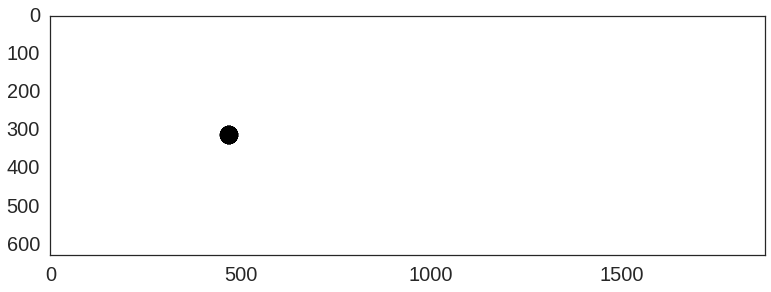

In [9]:
plt.imshow(sim.obstacle_mask_host.T)

Let's make a video of the flow now.

In [15]:
total_time_to_run=20

time_per_iteration = .1 #In dimensionless units
steps_per_iteration = int(time_per_iteration/sim.delta_t)
print 'Running for', steps_per_iteration, 'iterations between frames'
print 'Corresponds to a non-dimensional time of ' , time_per_iteration

Running for 62 iterations between frames
Corresponds to a non-dimensional time of  0.1


In [16]:
total_num_steps = int(np.ceil(total_time_to_run/time_per_iteration))

In [17]:
from IPython import display

In [18]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [22]:
offset = 1200

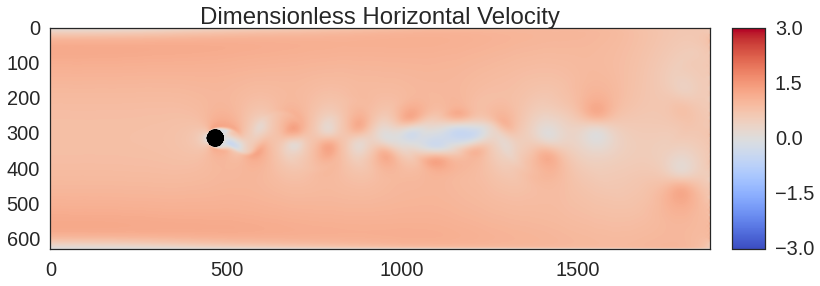

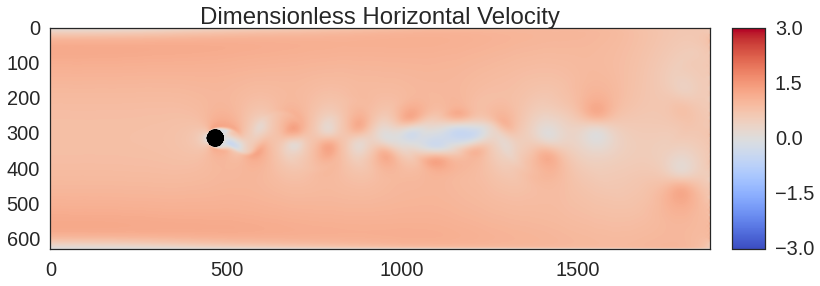

In [23]:
for i in range(total_num_steps):
    plt.clf()

    fields = sim.get_nondim_fields()
    
    u = fields['u']
    u[sim.obstacle_mask_host.astype(np.bool)] = np.nan
    
    cmap = cm.coolwarm    
    cmap.set_bad(color='k', alpha=1.)
    
    im = plt.imshow(fields['u'].T, cmap=cmap, interpolation=None)

    plt.clim(-3, 3)
    plt.title('Dimensionless Horizontal Velocity')
    
    divider = make_axes_locatable(plt.gca())
    cax = divider.append_axes('right', size='5%', pad=0.3)
    plt.colorbar(im, cax=cax, ticks=[-3,-1.5,0,1.5,3])

    plt.savefig('{0:05}'.format(offset + i) + '.png', dpi=200, bbox_inches='tight')
    
    print 'Updated!'
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    
    sim.run(steps_per_iteration)